In [172]:
%pip install -r requirements.txt &> /dev/null

Note: you may need to restart the kernel to use updated packages.


In [173]:
RANDOM_STATE = 27

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns

In [175]:
df = pd.read_csv("./data/weather.csv")
df.iloc[:10, :]

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [176]:
from datetime import date

def get_month(date_str):
    parts = [int(c) for c in date_str.split("-")]
    return date(*parts).month

month_col = df["date"].apply(get_month)
df.insert(0, "month", month_col)

df.drop("date", axis=1, inplace=True)

In [177]:
df.head(10)

,month,precipitation,temp_max,temp_min,wind,weather
0,1,0.0,12.8,5.0,4.7,drizzle
1,1,10.9,10.6,2.8,4.5,rain
2,1,0.8,11.7,7.2,2.3,rain
3,1,20.3,12.2,5.6,4.7,rain
4,1,1.3,8.9,2.8,6.1,rain
5,1,2.5,4.4,2.2,2.2,rain
6,1,0.0,7.2,2.8,2.3,rain
7,1,0.0,10.0,2.8,2.0,sun
8,1,4.3,9.4,5.0,3.4,rain
9,1,1.0,6.1,0.6,3.4,rain


In [178]:
X = df.loc[:, :"wind"]
X

,month,precipitation,temp_max,temp_min,wind
0,1,0.0,12.8,5.0,4.7
1,1,10.9,10.6,2.8,4.5
2,1,0.8,11.7,7.2,2.3
3,1,20.3,12.2,5.6,4.7
4,1,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,12,8.6,4.4,1.7,2.9
1457,12,1.5,5.0,1.7,1.3
1458,12,0.0,7.2,0.6,2.6
1459,12,0.0,5.6,-1.0,3.4


In [179]:
Y = df.loc[:, "weather"]
Y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

## Verificar se existem classes majoritárias e minoritárias

/Users/luiz/Code/ps4-ai/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/luiz/Code/ps4-ai/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/luiz/Code/ps4-ai/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='weather', ylabel='count'>

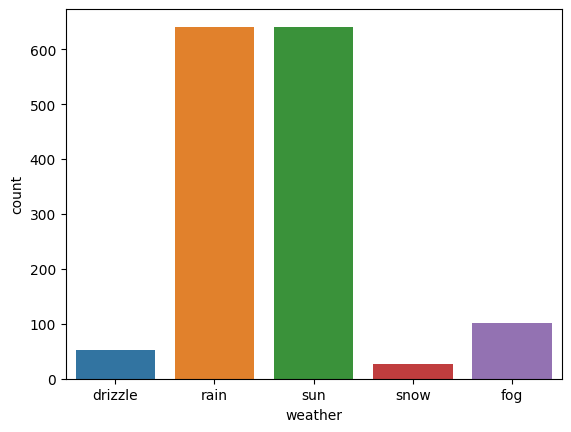

In [180]:
x = np.unique(df['weather'], return_counts=True)
sns.countplot(x = df['weather'])

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=RANDOM_STATE,
)

In [206]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    random_state=RANDOM_STATE
)
model.fit(X_train.values, Y_train.values)

DecisionTreeClassifier(max_depth=6, random_state=27)

In [207]:
test_predictions = model.predict(X_test.values)
test_predictions[:10]

array(['rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun',
       'rain'], dtype=object)

In [208]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, test_predictions)

0.8020477815699659

0.8020477815699659

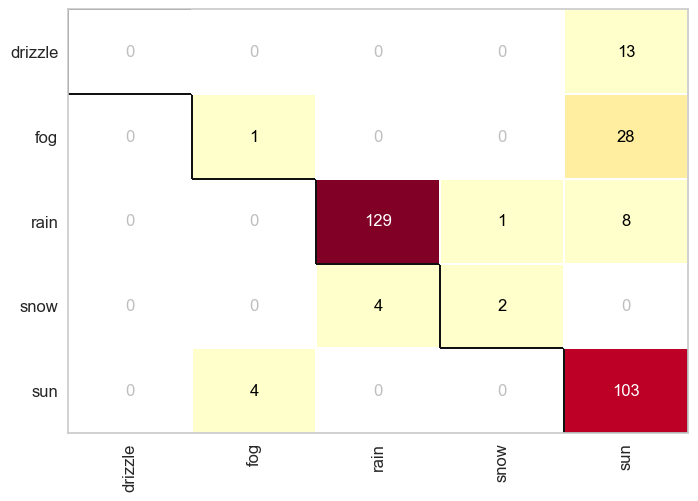

In [209]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model)
cm.fit(X_train.values, Y_train)
cm.score(X_test.values, Y_test)

In [210]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        13
         fog       0.20      0.03      0.06        29
        rain       0.97      0.93      0.95       138
        snow       0.67      0.33      0.44         6
         sun       0.68      0.96      0.80       107

    accuracy                           0.80       293
   macro avg       0.50      0.45      0.45       293
weighted avg       0.74      0.80      0.75       293



/Users/luiz/Code/ps4-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luiz/Code/ps4-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/luiz/Code/ps4-ai/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5508928571428572, 0.9285714285714286, 'x[1] <= 0.15\ngini = 0.601\nsamples = 1168\nvalue = [40, 72, 503, 20, 533]\nclass = sun'),
 Text(0.2910714285714286, 0.7857142857142857, 'x[0] <= 1.5\ngini = 0.367\nsamples = 679\nvalue = [40, 72, 34, 0, 533]\nclass = sun'),
 Text(0.09642857142857143, 0.6428571428571429, 'x[3] <= 0.05\ngini = 0.649\nsamples = 45\nvalue = [6, 15, 3, 0, 21]\nclass = sun'),
 Text(0.02857142857142857, 0.5, 'x[4] <= 1.15\ngini = 0.48\nsamples = 15\nvalue = [6, 0, 0, 0, 9]\nclass = sun'),
 Text(0.014285714285714285, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = drizzle'),
 Text(0.04285714285714286, 0.35714285714285715, 'x[2] <= 1.95\ngini = 0.375\nsamples = 12\nvalue = [3, 0, 0, 0, 9]\nclass = sun'),
 Text(0.02857142857142857, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]\nclass = drizzle'),
 Text(0.05714285714285714, 0.21428571428571427, 'x[3] <= -2.5\ngini = 0.298\nsamples = 11\nvalue = [2, 0, 0, 0, 9]

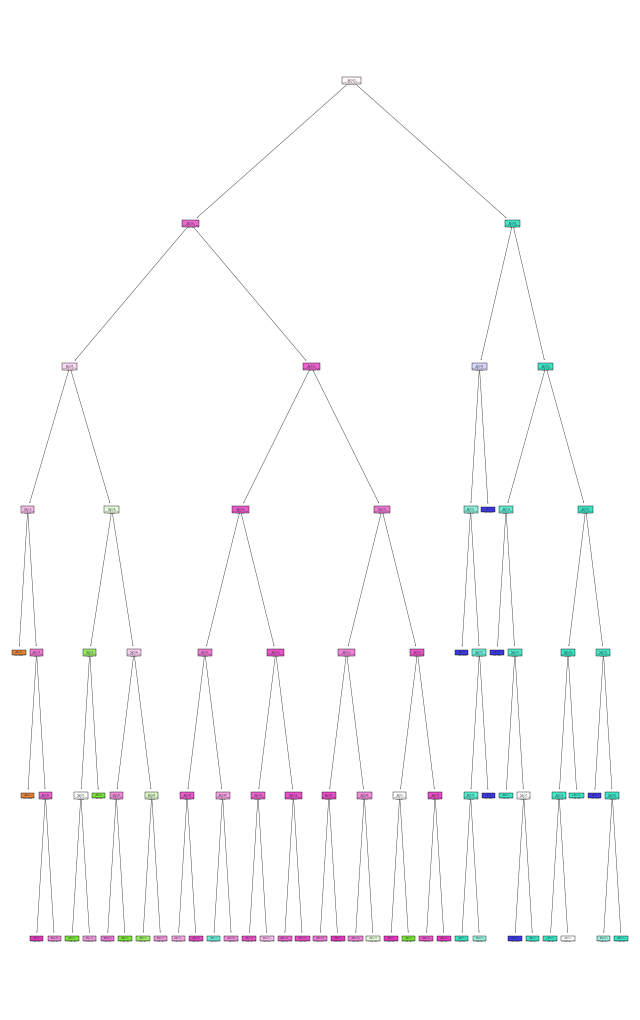

In [211]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(nrows=1, ncols=1, figsize=(8, 13))
tree.plot_tree(
    model,
    class_names=model.classes_.tolist(),
    filled=True,
)